# Exploring Shapely

In [1]:
import shapely
from shapely import geometry, affinity

import itertools
import numpy as np

## Points

In [2]:
pt1 = geometry.Point(0.0, 0.0)

In [3]:
pt1.x, pt1.y

(0.0, 0.0)

In [4]:
pt1.coords

In [5]:
len(pt1.coords)

1

In [6]:
pt1.coords[0]

(0.0, 0.0)

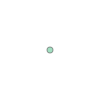

In [7]:
pt2 = geometry.Point(1.0, 1.0)
pt2

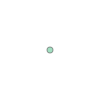

In [8]:
pt3 = pt1 - pt2
pt3

In [9]:
pt3.x, pt3.y

(0.0, 0.0)

## Circles

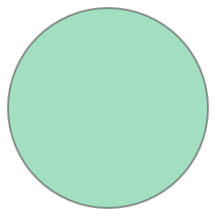

In [10]:
circle1 = geometry.Point(0, 0).buffer(100.0)
circle1

In [11]:
type(circle1)

shapely.geometry.polygon.Polygon

### Area

In [12]:
circle1.area

31365.48490545938

In [13]:
np.pi * 100.0**2

31415.926535897932

Why is the area incorrect?

Because it's actually a polygon approximation, not a true circle.  If we increase the `resolution` of the approximation, it gets closer.

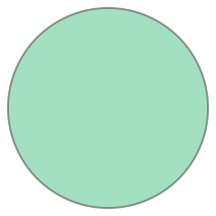

In [14]:
fine_circle = geometry.Point(0.0, 0.0).buffer(100.0, resolution=128)
fine_circle

In [15]:
fine_circle.area

31415.13801144302

### Circumference

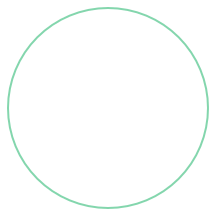

In [16]:
circle1.boundary

In [17]:
circle1.boundary.length

628.066231390951

In [18]:
2 * np.pi * 100.0

628.3185307179587

Similarly, the circumference is a bit off since it's actually a polygon.

### Rectangles

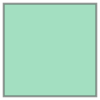

In [19]:
r1 = geometry.Polygon(shell=((0.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)))
r1

In [20]:
r1.area

1.0

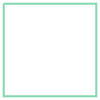

In [21]:
r1.boundary

In [22]:
r1.boundary.length

4.0

### Intersections

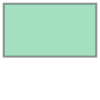

In [23]:
r2 = geometry.Polygon(shell=((0.5, 2.5), (0.5, 2.5), (4.0, 2.5), (4.0, 0.5), (0.5, 0.5)))
r2

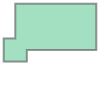

In [24]:
r1.union(r2)

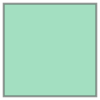

In [25]:
r1.intersection(r2)

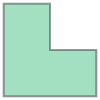

In [26]:
r1.difference(r2)

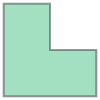

In [27]:
r1 - r2

### Point Collections

In [74]:
time = np.linspace(-np.pi, np.pi, 30)

circle_points = [geometry.Point(x, y) for x, y in zip(np.sin(time), np.cos(time))]

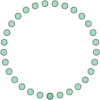

In [75]:
geometry.MultiPoint(circle_points)

We don't have to construct points though, can use NumPy array directly.

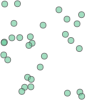

In [77]:
random_points = 10 * np.random.random((30, 2))

geometry.MultiPoint(random_points)

### Making waves

In [28]:
time = np.linspace(0.0, 6.0 * np.pi, 100)

xs = np.sin(time)
ys = 3.0 + np.cos(time)

points = [geometry.Point(x, y) for x, y in itertools.chain(zip(time, xs), reversed(list(zip(time, ys))))]

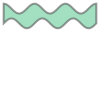

In [29]:
wave = geometry.Polygon(shell=points)
wave

In [30]:
wave.area

56.54866776461627

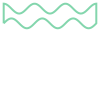

In [31]:
wave.boundary

In [32]:
wave.boundary.length

53.820675566627216

### Line strings

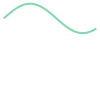

In [67]:
geometry.LineString(list(zip(time, xs)))

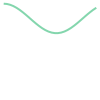

In [68]:
geometry.LineString(list(zip(time, ys)))

### Affine Transformations

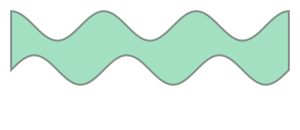

In [40]:
big_wave = affinity.scale(wave, xfact=20.0, yfact=20.0)
big_wave

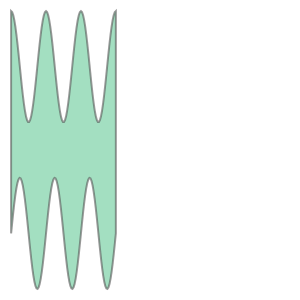

In [41]:
affinity.scale(wave, xfact=20.0, yfact=200.0)

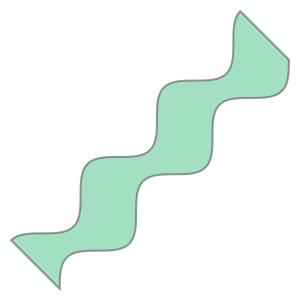

In [42]:
affinity.rotate(big_wave, 45.0)

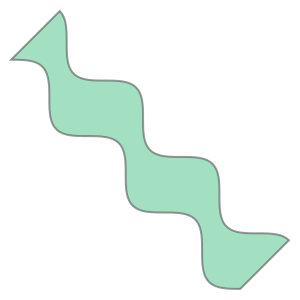

In [46]:
affinity.rotate(big_wave, -np.pi / 4.0, use_radians=True)

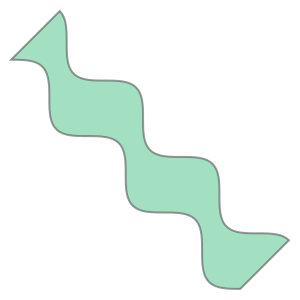

In [52]:
affinity.rotate(big_wave, -np.pi / 4.0, origin=(0.0, 0.0), use_radians=True)

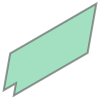

In [58]:
affinity.skew(r2 - r1, 10.0, 30.0)